In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df.drop('id',axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(df.loc[df['gender']=='Other'].index,inplace=True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
categorical_feature=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
categorical_fea=[feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_fea].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked


In [ ]:
encoder=LabelEncoder()
for feature in categorical_fea:
  df[feature]=encoder.fit_transform(df[feature])

In [ ]:
pca=PCA(n_components=3)
df_pca=pca.fit(df).transform(df)

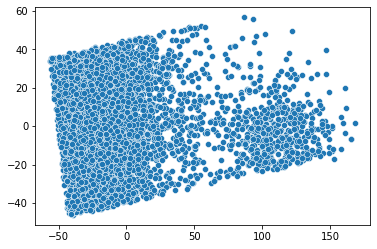

In [ ]:
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1])
plt.show()

In [ ]:
def k_means(data, n_clusters):
  k_means = KMeans(n_clusters=n_clusters, max_iter=50, random_state=1)
  k_means.fit(data)
  labels = k_means.labels_
  centroids = k_means.cluster_centers_
  pd.DataFrame(centroids)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)
  sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker="*", color="g", s=500)
  plt.show()

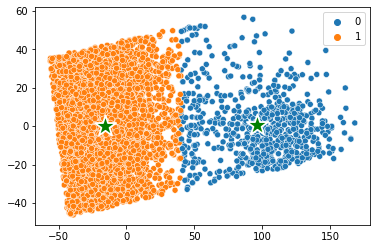

In [ ]:
k_means(df_pca, 2)

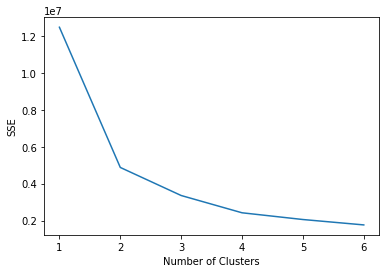

In [ ]:
numClusters = 7
SSE = []
silhouette_coefficients = []
for k in range(1, numClusters):
  k_means = KMeans(n_clusters=k)
  k_means.fit(df_pca)
  SSE.append(k_means.inertia_)
  if k<=1:
    continue
  score = silhouette_score(df_pca, k_means.labels_)
  silhouette_coefficients.append(score)
plt.plot(range(1, numClusters), SSE);
plt.xlabel('Number of Clusters');
plt.ylabel('SSE');


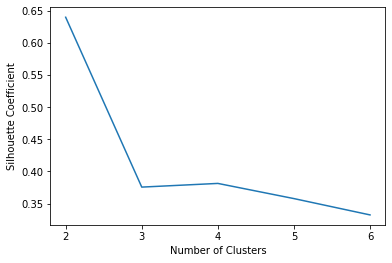

In [ ]:
plt.plot(range(2, numClusters), silhouette_coefficients)
plt.xticks(range(2, numClusters))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

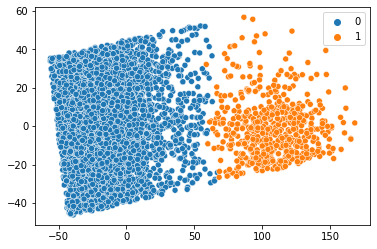

In [ ]:
ac = AgglomerativeClustering(n_clusters=2).fit(df_pca)
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=ac.labels_)
plt.show()

In [ ]:
print(ac.n_clusters_)
print(ac.n_connected_components_)

2
1


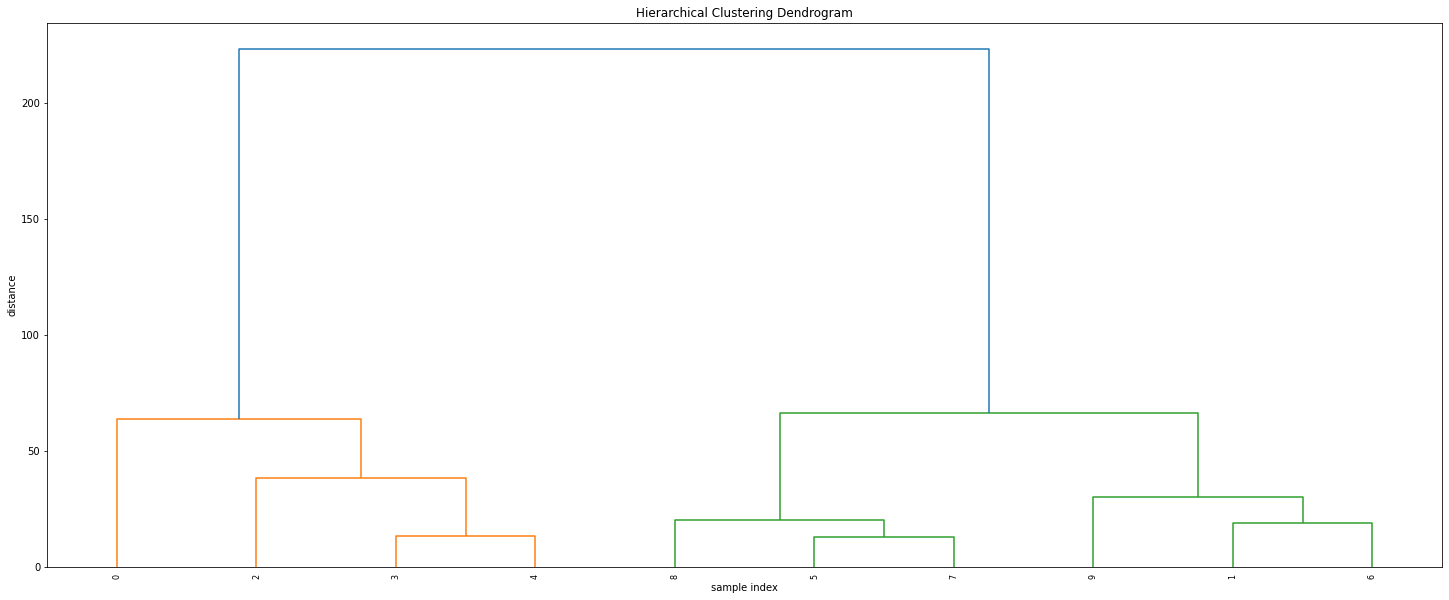

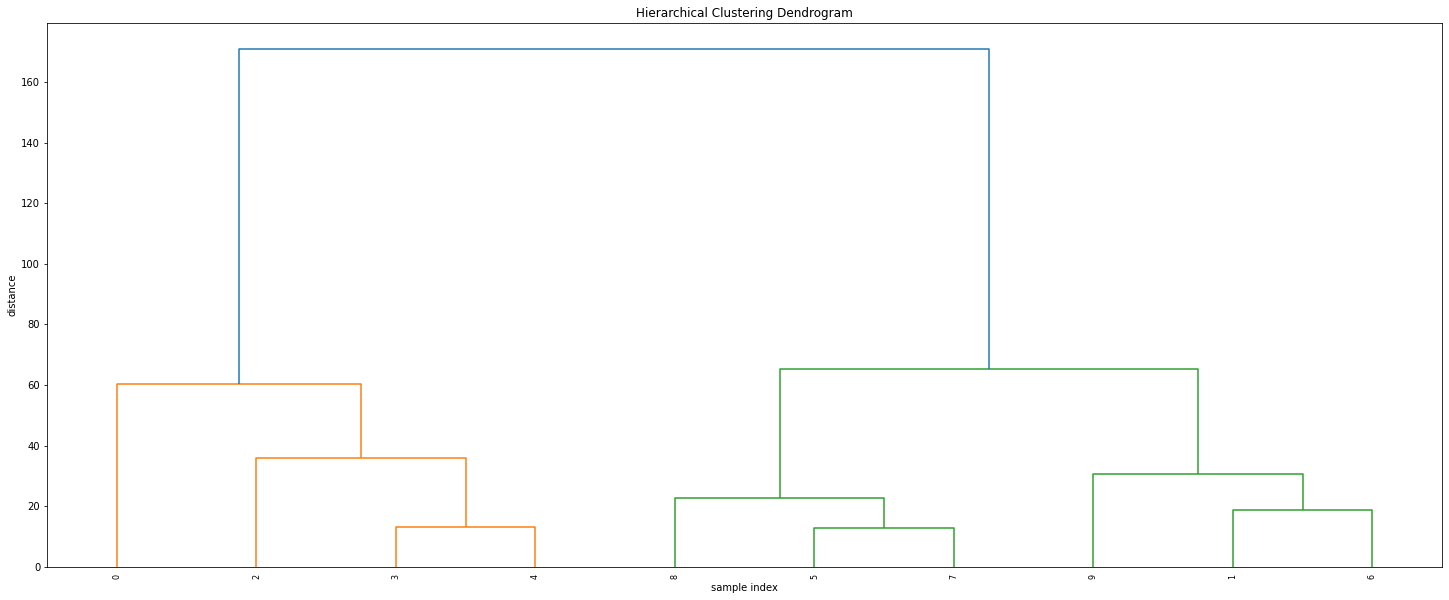

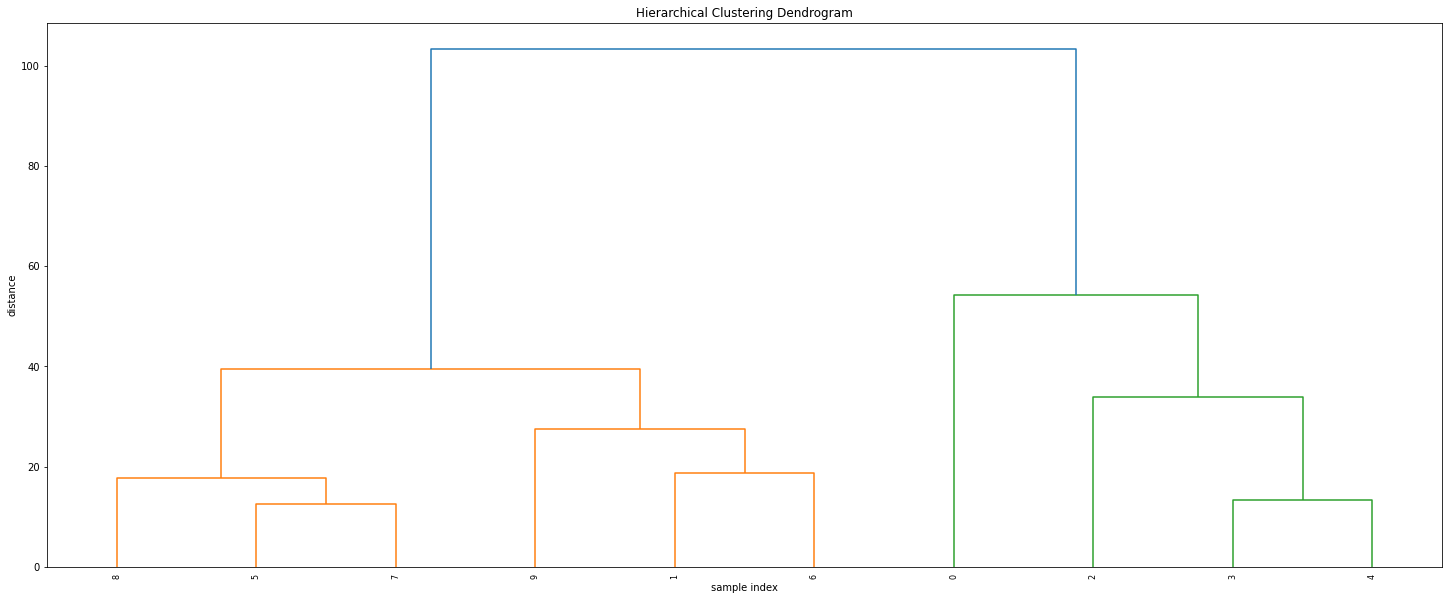

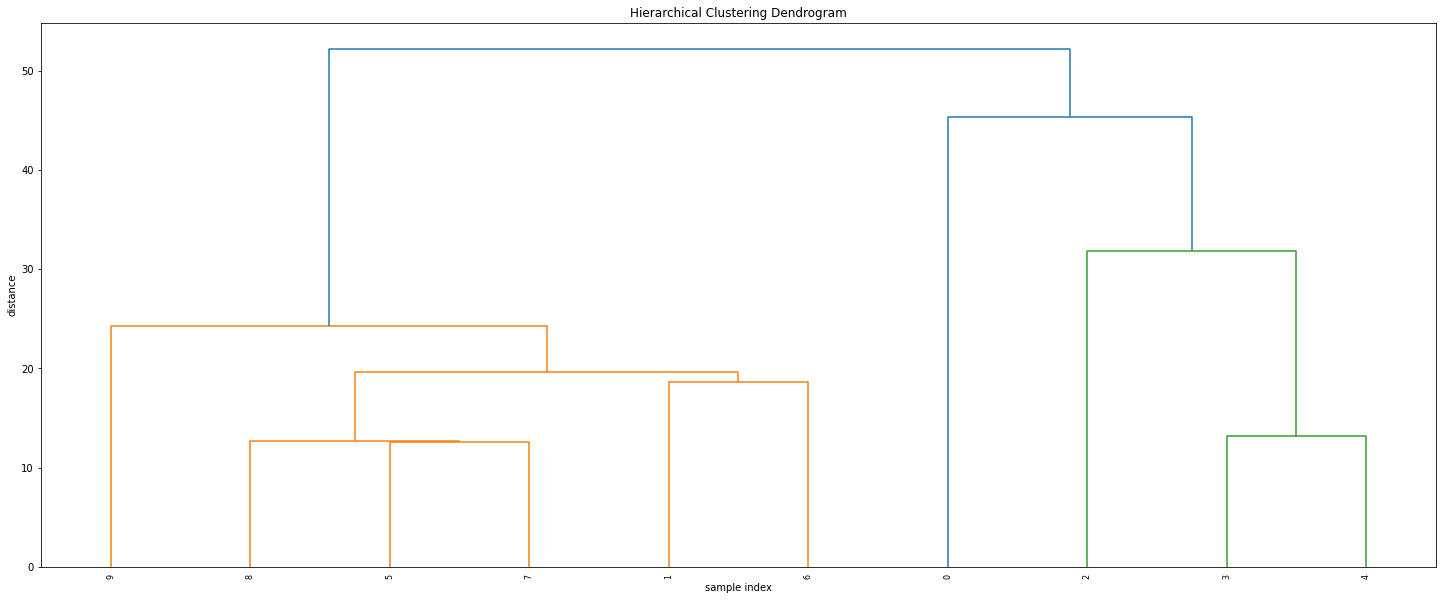

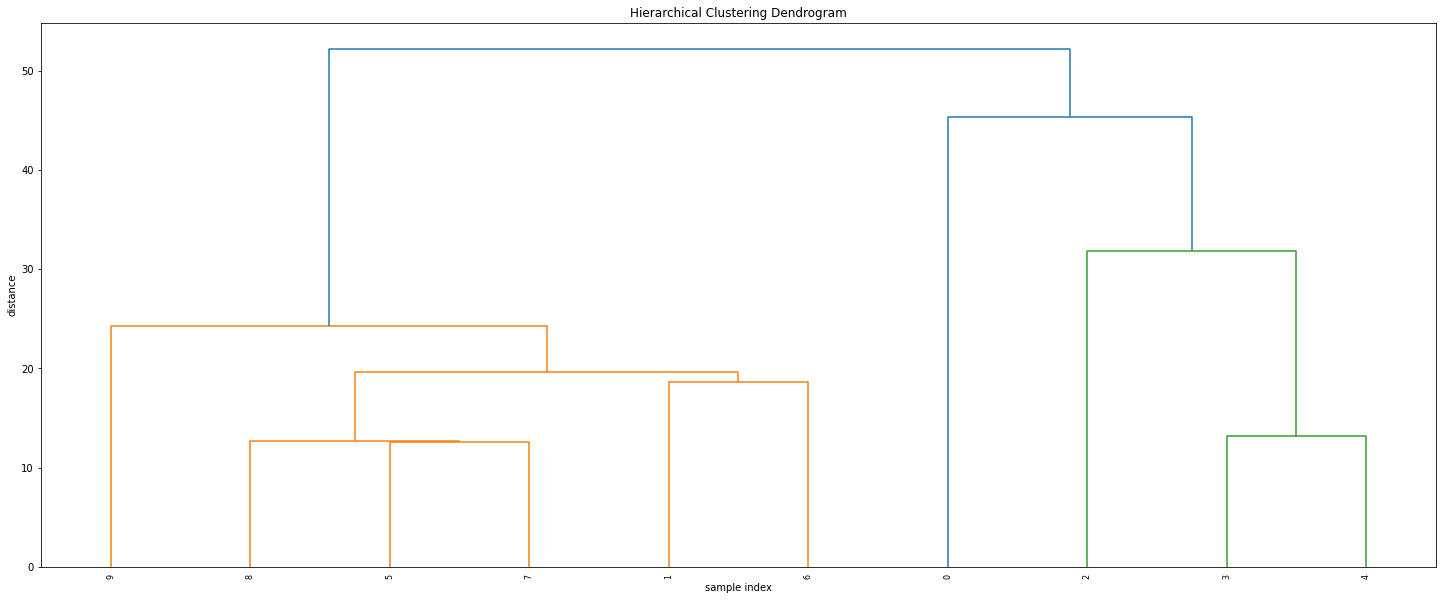

In [ ]:
linkage_types = ['ward', 'complete', 'average', 'single']
for link_type in linkage_types:
  Z = linkage(df_pca[:10], link_type)
  plt.figure(figsize=(25, 10))
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('sample index')
  plt.ylabel('distance')
  dendrogram(Z, leaf_rotation=90., leaf_font_size=8.);
  plt.show();
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp');

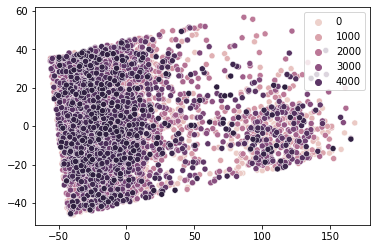

In [ ]:
db = DBSCAN(eps=0.1, min_samples=1).fit(df_pca)
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=db.labels_)
plt.show()